<h1><center> KNN & Random Forest : </center></h1>

## Import Libraries

In [3]:
import numpy as npSlide
from sklearn.model_selection import train_test_split,  cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## KNN

### Première partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset non équilibré (avant l'application du SMOTE sur les données d'entraînement)

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
test_data.drop(columns='Unnamed: 0',inplace=True)
train_data.drop(columns='Unnamed: 0',inplace=True)

In [6]:
X_train=train_data.drop('outcome',axis=1)
y_train=train_data['outcome']

In [7]:
X_test=test_data.drop('outcome',axis=1)
y_test=test_data['outcome']

#### Utilisation de la validation croisée pour optimiser les hyper-paramétres du modèle

In [8]:
# Paramètres à optimiser
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Essayez différents nombres de voisins
    'p': [1, 2],  # 1 pour la distance de Manhattan, 2 pour la distance euclidienne
}

# Initialiser le modèle K-NN
knn_model = KNeighborsClassifier()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Faire des prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)

Meilleurs hyperparamètres: {'n_neighbors': 9, 'p': 1}


#### Evaluation de KNN

Matrice de confusion:
[[378   5]
 [ 18   2]]


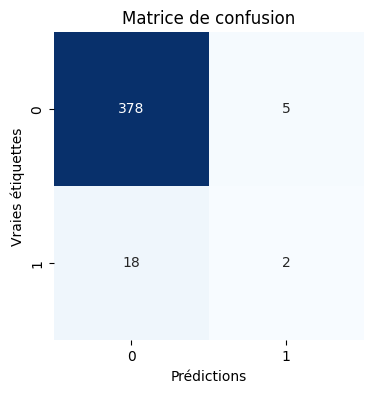

 Précision : 0.29, F1-score : 0.15, Rappel : 0.10
Balanced Accuracy : 0.54, AUC-ROC : 0.54


In [9]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")

### Deuxième partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset équilibré (après l'application du SMOTE sur les données d'entraînement)

In [10]:
train_smote = pd.read_csv('train_smote.csv')

In [11]:
#test_data.drop(columns='Unnamed: 0',inplace=True)
train_smote.drop(columns='Unnamed: 0',inplace=True)

In [12]:
X_train=train_smote.drop('outcome',axis=1)
y_train=train_smote['outcome']

#### Utilisation de la validation croisée pour optimiser les hyper-paramétres du modèle

In [13]:
# Paramètres à optimiser
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Essayez différents nombres de voisins
    'p': [1, 2],  # 1 pour la distance de Manhattan, 2 pour la distance euclidienne
}

# Initialiser le modèle K-NN
knn_model = KNeighborsClassifier()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Faire des prédictions sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test)

Meilleurs hyperparamètres: {'n_neighbors': 3, 'p': 1}


#### Evaluation de KNN

Matrice de confusion:
[[331  52]
 [  7  13]]


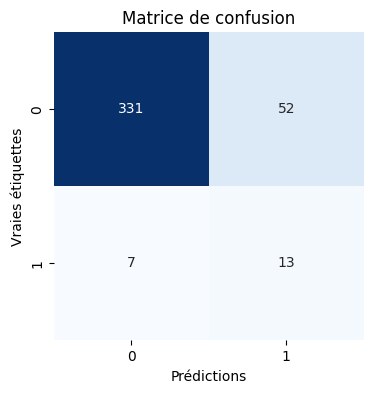

 Précision : 0.20, F1-score : 0.31, Rappel : 0.65
Balanced Accuracy : 0.76, AUC-ROC : 0.76


In [14]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")

## Random Forest

### Première partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset non équilibré (avant l'application du SMOTE sur les données d'entraînement)

In [15]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [16]:
X_train=train_data.drop('outcome',axis=1)
y_train=train_data['outcome']
X_test=test_data.drop('outcome',axis=1)
y_test=test_data['outcome']

In [17]:
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

### Evaluation du modèle

Matrice de confusion:
[[380   3]
 [ 14   6]]


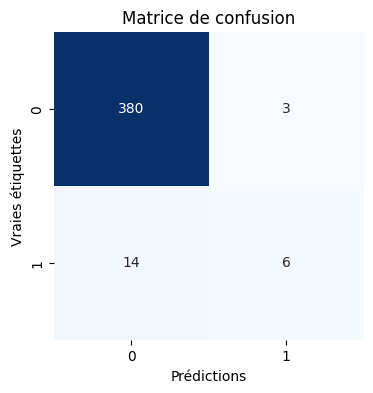

 Précision : 0.67, F1-score : 0.41, Rappel : 0.30
Balanced Accuracy : 0.65, AUC-ROC : 0.65


In [18]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred_rf)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred_rf)

# F1-score
f1 = f1_score(y_test, y_pred_rf)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")

### Deuxième partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset équilibré (après l'application du SMOTE sur les données d'entraînement)

In [19]:
train_smote = pd.read_csv('train_smote.csv')
test_data = pd.read_csv('test.csv')

In [20]:
#test_data.drop(columns='Unnamed: 0',inplace=True)
train_smote.drop(columns='Unnamed: 0',inplace=True)
test_data.drop(columns='Unnamed: 0',inplace=True)

In [21]:
X_train=train_smote.drop('outcome',axis=1)
y_train=train_smote['outcome']

In [22]:
X_test=test_data.drop('outcome',axis=1)
y_test=test_data['outcome']

In [23]:
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

Matrice de confusion:
[[372  11]
 [ 10  10]]


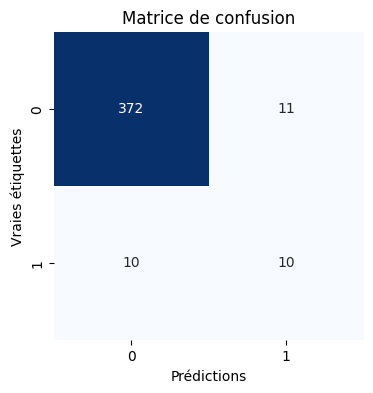

 Précision : 0.48, F1-score : 0.49, Rappel : 0.50
Balanced Accuracy : 0.74, AUC-ROC : 0.74


In [24]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred_rf)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred_rf)

# F1-score
f1 = f1_score(y_test, y_pred_rf)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")